In [1]:
import time
import datetime
from PIL import Image
from IPython.display import Image as NotebookImage
import array

# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193 

def calculate_z_serial_purepython(maxiter, zs, cs):
    """
        zs: complex z coordinates
        cs: a complex initial condition
    """
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
            
        output[i] = n
    return output

def calc_pure_python(save_image, desired_width, max_iterations):
    x_step = (float(x2 - x1) / float(desired_width))
    y_step = (float(y1 - y2) / float(desired_width))
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
        
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    
    width = len(x)
    height = len(y)
    
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print ("Length of x:", len(x))
    print ("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print (calculate_z_serial_purepython.__name__ + " took", secs, "seconds")
    
    assert sum(output) == 33219980

    if save_image:
        generate_image(output, width, height, max_iterations)

def generate_image(output_raw, width, height, max_iterations):
    """Convert list to array, show using PIL"""
    # convert our output to PIL-compatible input
    # scale to [0...255]
    max_iterations = float(max(output_raw))
    print("Max Iterations:", max_iterations)
    scale_factor = float(max_iterations)
    scaled = [int(o / scale_factor * 255) for o in output_raw]
    output = array.array('B', scaled)  # array of unsigned ints
    # display with PIL
    filename = "./{}.png".format(datetime.datetime.now().isoformat())
    print("Filename:", filename)
    im = Image.new("L", (width, width))
    # EXPLAIN RAW L 0 -1
    im.frombytes(output.tobytes(), "raw", "L", 0, -1)
    im.save(filename)
    
calc_pure_python(save_image=True, desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 11.504215478897095 seconds
Max Iterations: 300.0
Filename: ./2016-11-17T23:48:16.685177.png


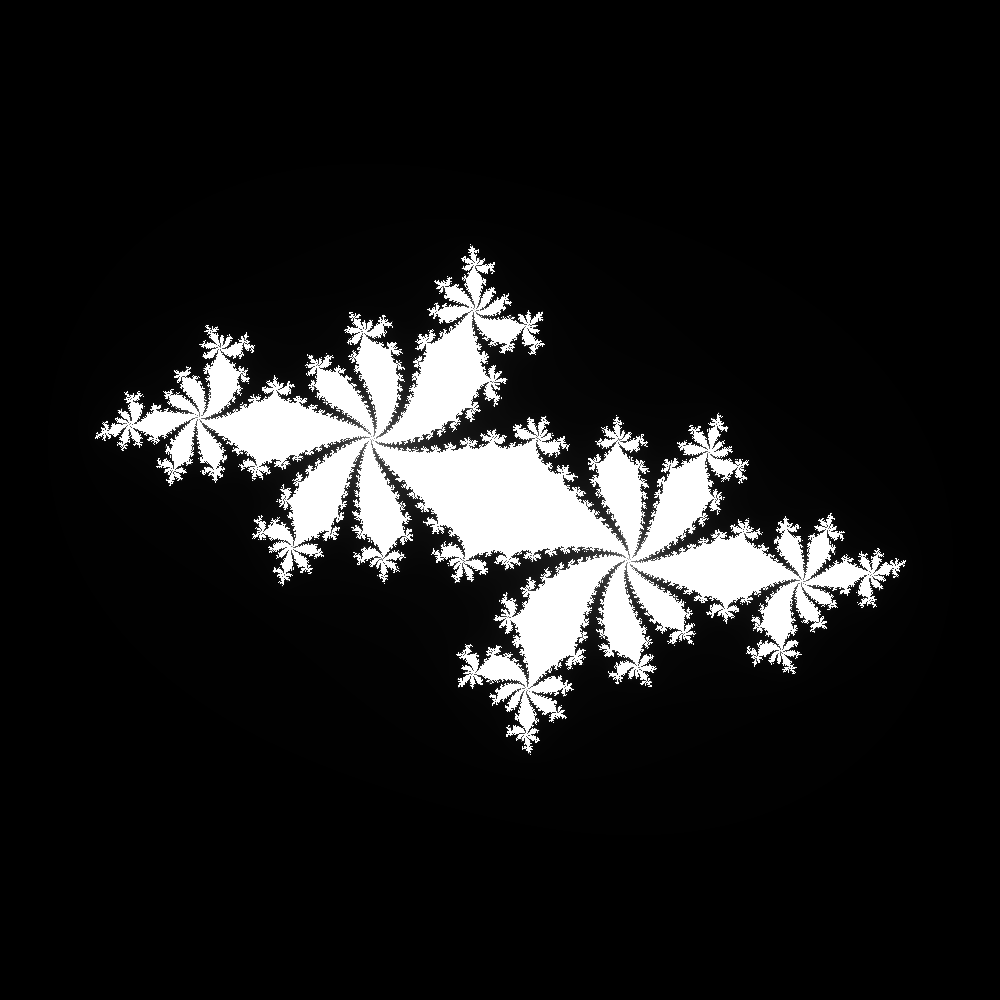

In [2]:
NotebookImage(filename="./2016-11-17T23:48:16.685177.png")